In [ ]:
#IMPORT NECESSARY PACKAGES 
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import re

In [ ]:
page = requests.get("https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&view=advanced")
soup_href = BeautifulSoup(page.content, 'html.parser')

for i in range(0,110):
    href = soup_href.find_all(class_="lister-item-index unbold text-primary", href=True)
    for i in href:
        x = href.get_text()
        print(x)

# Reading the data from csv file created with No Code webscrapper 
imdb = pd.read_csv("/home/jovyan/work/IMDbTop1000SortedbyI1.csv")
get_list = imdb['Field1_Link'].tolist()
tt_numbers = []

# Cleaning the Year Data
for index, row in imdb.iterrows():
    year = re.sub('\D', '', imdb.at[index, 'Year'])
    imdb.at[index, 'Year'] = year

# Get the filming dates by unique href numbers
for i in get_list:
    tt_numbers.append(re.sub('\D', '', i))
filming_dates= []
for i in tt_numbers:
    page = requests.get("https://www.imdb.com/title/tt{}/locations?ref_=tt_dt_dt".format(i))
    soup = BeautifulSoup(page.content, 'html.parser')
    x = soup.find('li', {'class': "ipl-zebra-list__item"})
    try:
        filming_dates.append(x.get_text().replace('\n', '').strip())
    except:
        filming_dates.append('No Dates available')
        
# print(filming_dates)
df = pd.DataFrame(filming_dates, columns= ['Filming Dates'])

df

,Filming Dates
0,16 June 1993 - 10 September 1993
1,29 March 1971 - 6 August 1971
2,18 April 2007 - 11 November 2007
3,1 October 1973 - 19 June 1974
4,June 1956 - July 1956
...,...
95,13 January 2003 - 3 April 2003
96,No Dates available
97,18 October 1999 - 12 December 1999
98,19 April 1999 - 16 June 1999


In [ ]:
# Concatenate the main dataframe and the filming dates dataframe
Timdb = pd.concat([imdb,df],axis=1)
PPP=Timdb.drop(columns = ['Field10_Link','Field9_Link','Field8_Link','Field7_Link','Field6_Link'])

In [ ]:
# Normalized Duration

tempdf = PPP[['Time', 'Rating']]

time_list = []
for i in PPP['Time']:
    time_list.append(int(re.sub('\D', '', i)))

df_time = pd.DataFrame(time_list, columns=['Normalized Duration'])

normalized_duration=(df_time-df_time.min())/(df_time.max()-df_time.min())
normalized_duration


,Normalized Duration
0,0.387324
1,0.619718
2,0.457746
3,0.809859
4,0.063380
...,...
95,0.147887
96,0.246479
97,0.105634
98,0.105634


In [ ]:
# Normalized Rating

normalized_Ratings_series=(PPP["Rating"]-PPP["Rating"].min())/(PPP["Rating"].max()-PPP["Rating"].min())
normalized_ratings=pd.DataFrame(normalized_Ratings_series)
normalized_ratings

,Rating
0,1.0
1,0.9
2,0.7
3,0.7
4,0.7
...,...
95,0.0
96,0.0
97,0.0
98,0.0


In [ ]:
# Normalizing the filming duration 

import datetime

filming_duration = []

for index, row in imdb.iterrows():
    fmt2 = '%d %B %Y'
    sep = '-'
    filming_dates = PPP.at[index, 'Filming Dates']
    filming_start = filming_dates.split(sep, 1)[0].strip()
    if len(filming_start) <= 5:
        fin_filming_start = '1 January ' + filming_start
    elif filming_start[0].isdigit() or filming_start[1].isdigit() or filming_start[0:8] == 'No Dates':
        fin_filming_start = filming_start
    else:
        fin_filming_start = '1 ' + filming_start
    try:
        filming_end = filming_dates.split(sep, 1)[1].strip()
    except:
        filming_end = 'No Dates available'
    if len(filming_end) <= 5:
        fin_filming_end = '1 January ' + filming_end
    elif filming_end[0].isdigit() or filming_end[1].isdigit() or filming_start[0:8] == 'No Dates':
        fin_filming_end = filming_end
    else:
        fin_filming_end = '1 ' + filming_end
    try:
        dt1 = datetime.datetime.strptime(fin_filming_start, fmt2)
        dt2 = datetime.datetime.strptime(fin_filming_end, fmt2)
    except: 
        dt1 = 'NAN'
        dt2 = 'NAN'
    try:
        duration = dt2 - dt1
    except: 
        duration = 'NAN'
    filming_duration.append(duration)

df_filming = pd.DataFrame(filming_duration, columns=['Normalized filming duration'])

normalized_filming_series=(df_filming["Normalized filming duration"]-df_filming["Normalized filming duration"].min())/(df_filming["Normalized filming duration"].max()-df_filming["Normalized filming duration"].min())
normalized_filming_duration = pd.DataFrame(normalized_filming_series)

normalized_filming_duration


,Normalized filming duration
0,0.038356
1,0.058447
2,0.093607
3,0.118265
4,0.012785
...,...
95,0.035616
96,NaN
97,0.024201
98,0.025571


In [ ]:
# adding the normalized duration and normalized rating to the main dataframe
final_db = pd.concat([PPP, normalized_duration, normalized_ratings, normalized_filming_duration], axis=1)
final_db


,Movie_Name,Field1_Link,Time,Genre,Year,Rating,Description,Director,Actor,Actor_2,Actor_3,Actor_4,Filming Dates,Normalized Duration,Rating,Normalized filming duration
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/?ref_=adv...,142 min,Drama,1994,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,16 June 1993 - 10 September 1993,0.387324,1.0,0.038356
1,The Godfather,https://www.imdb.com/title/tt0068646/?ref_=adv...,175 min,"Crime, Drama",1972,9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,29 March 1971 - 6 August 1971,0.619718,0.9,0.058447
2,The Dark Knight,https://www.imdb.com/title/tt0468569/?ref_=adv...,152 min,"Action, Crime, Drama",2008,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,18 April 2007 - 11 November 2007,0.457746,0.7,0.093607
3,The Godfather: Part II,https://www.imdb.com/title/tt0071562/?ref_=adv...,202 min,"Crime, Drama",1974,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1 October 1973 - 19 June 1974,0.809859,0.7,0.118265
4,12 Angry Men,https://www.imdb.com/title/tt0050083/?ref_=adv...,96 min,"Crime, Drama",1957,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,June 1956 - July 1956,0.063380,0.7,0.012785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Eternal Sunshine of the Spotless Mind,https://www.imdb.com/title/tt0338013/?ref_=adv...,108 min,"Drama, Romance, Sci-Fi",2004,8.3,"When their relationship turns sour, a couple u...",Michel Gondry,Jim Carrey,Kate Winslet,Tom Wilkinson,Gerry Robert Byrne,13 January 2003 - 3 April 2003,0.147887,0.0,0.035616
96,Amélie,https://www.imdb.com/title/tt0211915/?ref_=adv...,122 min,"Comedy, Romance",2001,8.3,Amélie is an innocent and naive girl in Paris ...,Jean-Pierre Jeunet,Audrey Tautou,Mathieu Kassovitz,Rufus,Lorella Cravotta,No Dates available,0.246479,0.0,NaN
97,Snatch,https://www.imdb.com/title/tt0208092/?ref_=adv...,102 min,"Comedy, Crime",2000,8.3,"Unscrupulous boxing promoters, violent bookmak...",Guy Ritchie,Jason Statham,Brad Pitt,Benicio Del Toro,Dennis Farina,18 October 1999 - 12 December 1999,0.105634,0.0,0.024201
98,Requiem for a Dream,https://www.imdb.com/title/tt0180093/?ref_=adv...,102 min,Drama,2000,8.3,The drug-induced utopias of four Coney Island ...,Darren Aronofsky,Ellen Burstyn,Jared Leto,Jennifer Connelly,Marlon Wayans,19 April 1999 - 16 June 1999,0.105634,0.0,0.025571


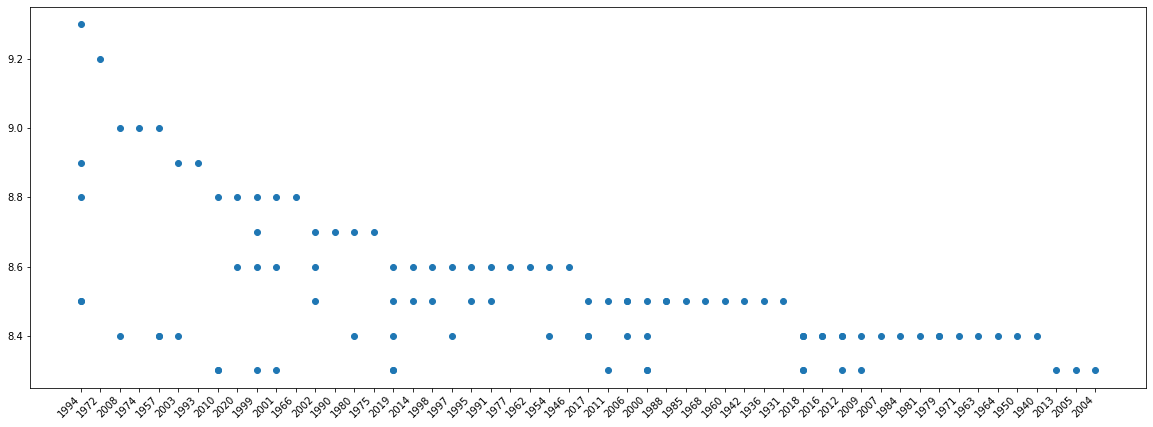

In [ ]:
# Movies' Rating by Year.

import matplotlib.pyplot as plt

plt.figure(figsize=(20,7))
plt.xticks(rotation=45, ha='right')
plt.scatter(PPP['Year'],PPP['Rating'])

plt.show()

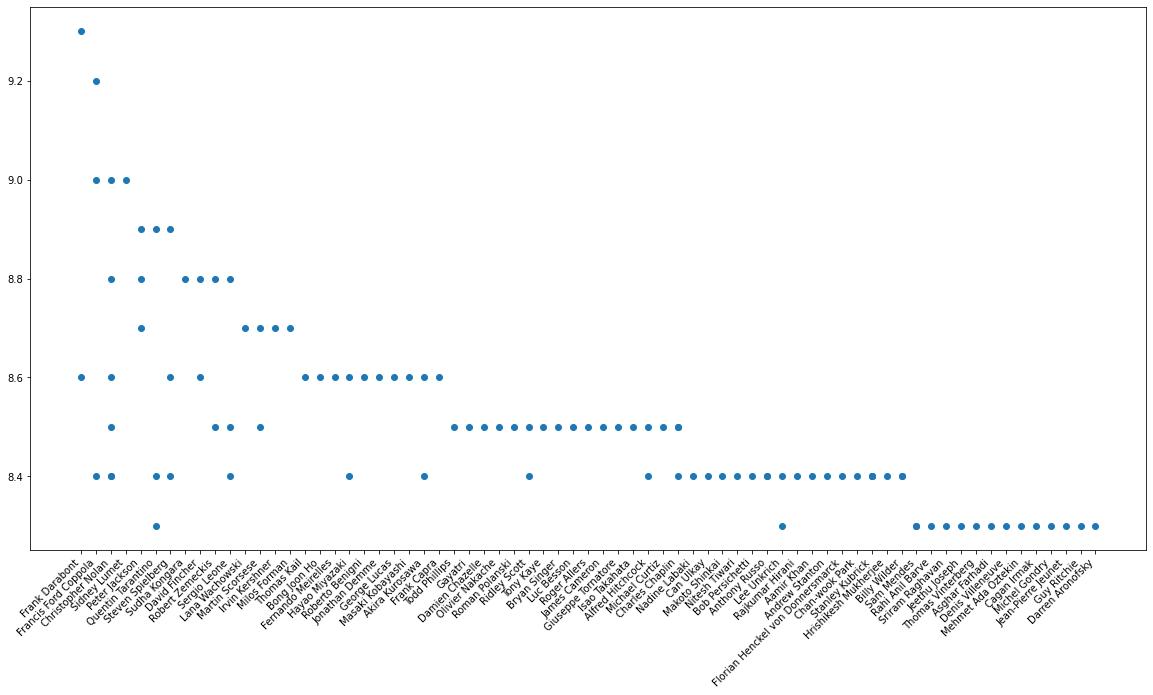

In [ ]:
# Number Movies' in top 100 by Director.

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.xticks(rotation=45, ha='right')
plt.scatter(PPP['Director'],PPP['Rating'])

plt.show()

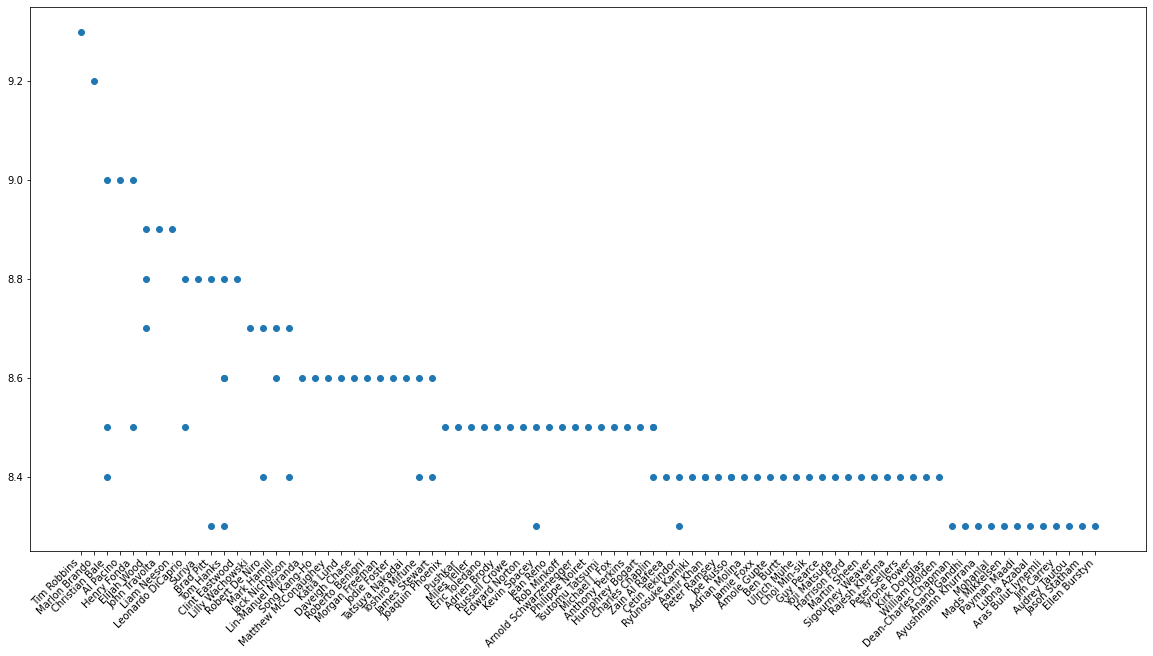

In [ ]:
# Number of Movies' in top 100 by Actor.

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.xticks(rotation=45, ha='right')
plt.scatter(PPP['Actor'],PPP['Rating'])

plt.show()

In [ ]:
# The code below this cell is for production only!!!

In [ ]:


#DEFINE FUCNTION 
def myStrip(i):
    a = 0
    for a in range(0, len(i) ,1):
       i[a] = i[a].text

In [ ]:
#Moviename = soup1.find_all('h3')

def myStrip(i):
    a = 0
    for a in range(0, len(i) ,1):
       i[a] = i[a].text
       #i[a] = i[a].replace('\n', '')
       #i[a] = re.sub(r"[^1-9a-zA-Z: ]+", "", i[a])
       #i[a] = i[a][1:-4]

#Moviename = soup1.find_all(class_='lister-item-index unbold text-primary')

myStrip(Moviename)
print(Moviename)

#soup.find_all("div", {"class": "tablebox"})

NameError: name 'Moviename' is not defined

In [ ]:
Moviename1 = Moviename
print(Moviename1)

In [ ]:
beginFrame = {'Title':Moviename1}
dframe = pd.DataFrame(beginFrame)

#dframe['Title'] = Moviename1 

dframe[['run','tur','re','2','3']] = dframe.Title.str.split("/n", expand=True)
dframe


In [ ]:
#MAKE A REQUEST OF URL

page = requests.get("https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating")

#PARSE HTLM
soup1 = BeautifulSoup(page.content, 'html.parser')


#DEFINE CESSARY VARIABLES

for i in range(0,101):
Moviename = soup1.find_all(class="lister-item-index unbold text-primary", href=True)#Param
Description = soup1.find_all("p", class_="text-muted", href=True)#param#
Releasedate = soup1.find_all("span", class_="lister-item-year text-muted unbold")#Gab# 
#Directorname = soup1.find_all("div", {"class", "a", href_="/name/nm0001104/?ref_=adv_li_dr_0"})#Gab#
Rating = soup1.find_all(class_="inline-block ratings-imdb-rating")[i].text #Param#
Genres = soup1.find_all(class_ = "genre")
Stars = soup1.find_all("div", class_="inline-block ratings-imdb-rating")
duration = soup1.find_all(class_ = "runtime")
#Filmingdatas = soup.find_all(class_="") 

#soup.find_all("div", {"class": "tablebox"})

#Rating = Rating[0].text


print()